# Second Order finite difference scheme for two point Boundary value Problem


Given equation : -U''(X) = f(X)

Subject to the conditions : U(0) = 0, U'(1) = 1

Approximation to second boundary condition is given by two different schemes S1 and S2 as follows:-

S1 : $$\frac{U_{n+1} - U_{n}}{h} = 1$$

S2 : $$\frac{U_{n+2} - U_{n}}{2h} = 1$$


We know by second order finite difference scheme, U''(X) can be written as:-

$$\frac{U_{j-1} - 2U_{j} + U_{j+1}}{h^{2}}$$

Therefore from the equation given in question to be solved; we get:-

$$\frac{U_{j-1} - 2U_{j} + U_{j+1}}{h^{2}} = -f(X_{j})$$

where we have defined a grid of n points from X = 0 to X = 1.

And $U_{j}$ = U($X_{j}$)

Using the conditions given in schemes S1 and S2, we can find relation between $U_{n}$ and $U_{n-1}$ as follows:-

For scheme S1 : $U_{n}$ - $U_{n-1}$ = h + $h^{2}$ * f($X_{n}$)

For scheme S2 : $U_{n}$ - $U_{n-1}$ = h + $h^{2}$ * f($X_{n}$) + $h^{2}$/2 * f($X_{n+1}$)

We can form a system of matrices based on the equations formed above as follows:-

Av = b

where A = coefficient matrix can be defined (for example for n = 4) as :-

[[2, -1, 0, 0]
 [-1, 2, -1, 0]
 [0, -1, 2, -1]
 [0, 0, -1, 1]]


v is a vector for approximated values of u at different grid points as [v1, v2, v3, v4]

b is a vector defined(for example for n=4):-

b = [$h^{2}$ f($X_{1}$),  $h^{2}$ f($X_{2}$),  $h^{2}$ f($X_{3}$),  h + $h^{2}$ f($X_{4}$)]

We can similarly define these matrices for different values of n.

Here, we will implement a function solve() in which inputs will be n and scheme and output will be X(i.e. vector for grid points) and v(vector for approximated values of function u).

We will plot the approximated values and original function u on graph and then calculate the error for different values of n and plot them.

Finally, we will find the convergence matrix that shows how fast the approximated values are converging towards original function values with respect to n.





In [1]:
#importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def solve(n, scheme):
    h = 1/(n+1)
    A = np.zeros((n,n))     #coefficient matrix
    A[0,0] = 2             
    A[0,1] = -1
    A[n-1,n-2] = -1
    A[n-1,n-1] = 1
    for i in range(1,n-1):
        A[i,i-1] = -1
        A[i,i] = 2
        A[i,i+1] = -1  
    
    X = np.linspace(h, h+((n-1)*h),n)      #X array
    F = -np.exp(X-1)                       #array for f(X) = -e^(X-1)
    b = h**2 * F                           #b array for right hand side
    if scheme == 'S1':
        b[n-1] = b[n-1] + h                #last entry change due to condition given in S1
    else:    
        b[n-1] = b[n-1] + h + (((h**2)/2) * (-1))    #last entry change due to condition given in S2
                                                    
    y = np.linalg.solve(A,b)                         #solving linear equations formed by above matrices defined
    return(X,y)

    




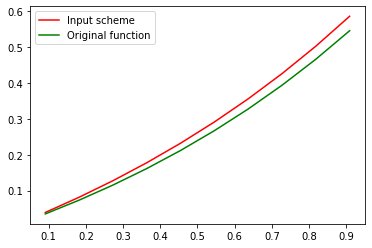

In [3]:
x,u = solve(n = 10 , scheme = 'S1')                #function call for solving linear equations
Uorig = (1/np.e)* (np.exp(x)-1)                    # exact function array
plt.plot(x,u, color='r', label = 'Input scheme')
plt.plot(x,Uorig, color = 'g', label = 'Original function')
plt.legend()
plt.show()

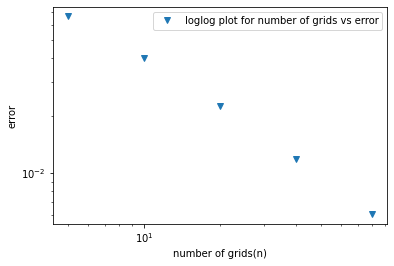

In [4]:
#for finding error
n = 5  #setting initial value of number of grids
iterations = 5
max_error = []
grids = []
step_size = []
for i in range(iterations):
    x,u = solve(n, scheme = 'S1')
    Uorig = (1/np.e)* (np.exp(x)-1)
    max_error.append(np.max(abs(Uorig-u)))
    grids.append(n)
    step_size.append(1/(n+1))
    n *= 2                    #doubling the value of grids in each iteration upto n=80
plt.xlabel('number of grids(n)')
plt.ylabel('error')
plt.loglog(grids,max_error,'v', label = 'loglog plot for number of grids vs error')
plt.legend()


In [5]:
#for finding rate of convergence
a = len(step_size)
conv = []      #array for rate of convergence
for i in range(a-1):
    conv.append((np.log(max_error[i]/max_error[i+1]))/(np.log(step_size[i]/step_size[i+1])))
print(conv)    
    
    
    

[0.8232081426674838, 0.9100679241772262, 0.9545983550580307, 0.9771827425336375]
